You are given an dataset with measurements of fish. Each row represents an individual fish. The measurements, such as weight in grams, length in centimeters, and the percentage ratio of height to length, have very different scales. 

## If we do not have ground truth, how many clusters should we create?

.. Use elbow function to find out!

In [1]:
fish = [[  242. ,    23.2,    25.4,    30. ,    38.4,    13.4],
       [  290. ,    24. ,    26.3,    31.2,    40. ,    13.8],
       [  340. ,    23.9,    26.5,    31.1,    39.8,    15.1],
       [  363. ,    26.3,    29. ,    33.5,    38. ,    13.3],
       [  430. ,    26.5,    29. ,    34. ,    36.6,    15.1],
       [  450. ,    26.8,    29.7,    34.7,    39.2,    14.2],
       [  500. ,    26.8,    29.7,    34.5,    41.1,    15.3],
       [  390. ,    27.6,    30. ,    35. ,    36.2,    13.4],
       [  450. ,    27.6,    30. ,    35.1,    39.9,    13.8],
       [  500. ,    28.5,    30.7,    36.2,    39.3,    13.7],
       [  475. ,    28.4,    31. ,    36.2,    39.4,    14.1],
       [  500. ,    28.7,    31. ,    36.2,    39.7,    13.3],
       [  500. ,    29.1,    31.5,    36.4,    37.8,    12. ],
       [  600. ,    29.4,    32. ,    37.2,    40.2,    13.9],
       [  600. ,    29.4,    32. ,    37.2,    41.5,    15. ],
       [  700. ,    30.4,    33. ,    38.3,    38.8,    13.8],
       [  700. ,    30.4,    33. ,    38.5,    38.8,    13.5],
       [  610. ,    30.9,    33.5,    38.6,    40.5,    13.3],
       [  650. ,    31. ,    33.5,    38.7,    37.4,    14.8],
       [  575. ,    31.3,    34. ,    39.5,    38.3,    14.1],
       [  685. ,    31.4,    34. ,    39.2,    40.8,    13.7],
       [  620. ,    31.5,    34.5,    39.7,    39.1,    13.3],
       [  680. ,    31.8,    35. ,    40.6,    38.1,    15.1],
       [  700. ,    31.9,    35. ,    40.5,    40.1,    13.8],
       [  725. ,    31.8,    35. ,    40.9,    40. ,    14.8],
       [  720. ,    32. ,    35. ,    40.6,    40.3,    15. ],
       [  714. ,    32.7,    36. ,    41.5,    39.8,    14.1],
       [  850. ,    32.8,    36. ,    41.6,    40.6,    14.9],
       [ 1000. ,    33.5,    37. ,    42.6,    44.5,    15.5],
       [  920. ,    35. ,    38.5,    44.1,    40.9,    14.3],
       [  955. ,    35. ,    38.5,    44. ,    41.1,    14.3],
       [  925. ,    36.2,    39.5,    45.3,    41.4,    14.9],
       [  975. ,    37.4,    41. ,    45.9,    40.6,    14.7],
       [  950. ,    38. ,    41. ,    46.5,    37.9,    13.7],
       [   40. ,    12.9,    14.1,    16.2,    25.6,    14. ],
       [   69. ,    16.5,    18.2,    20.3,    26.1,    13.9],
       [   78. ,    17.5,    18.8,    21.2,    26.3,    13.7],
       [   87. ,    18.2,    19.8,    22.2,    25.3,    14.3],
       [  120. ,    18.6,    20. ,    22.2,    28. ,    16.1],
       [    0. ,    19. ,    20.5,    22.8,    28.4,    14.7],
       [  110. ,    19.1,    20.8,    23.1,    26.7,    14.7],
       [  120. ,    19.4,    21. ,    23.7,    25.8,    13.9],
       [  150. ,    20.4,    22. ,    24.7,    23.5,    15.2],
       [  145. ,    20.5,    22. ,    24.3,    27.3,    14.6],
       [  160. ,    20.5,    22.5,    25.3,    27.8,    15.1],
       [  140. ,    21. ,    22.5,    25. ,    26.2,    13.3],
       [  160. ,    21.1,    22.5,    25. ,    25.6,    15.2],
       [  169. ,    22. ,    24. ,    27.2,    27.7,    14.1],
       [  161. ,    22. ,    23.4,    26.7,    25.9,    13.6],
       [  200. ,    22.1,    23.5,    26.8,    27.6,    15.4],
       [  180. ,    23.6,    25.2,    27.9,    25.4,    14. ],
       [  290. ,    24. ,    26. ,    29.2,    30.4,    15.4],
       [  272. ,    25. ,    27. ,    30.6,    28. ,    15.6],
       [  390. ,    29.5,    31.7,    35. ,    27.1,    15.3],
       [    6.7,     9.3,     9.8,    10.8,    16.1,     9.7],
       [    7.5,    10. ,    10.5,    11.6,    17. ,    10. ],
       [    7. ,    10.1,    10.6,    11.6,    14.9,     9.9],
       [    9.7,    10.4,    11. ,    12. ,    18.3,    11.5],
       [    9.8,    10.7,    11.2,    12.4,    16.8,    10.3],
       [    8.7,    10.8,    11.3,    12.6,    15.7,    10.2],
       [   10. ,    11.3,    11.8,    13.1,    16.9,     9.8],
       [    9.9,    11.3,    11.8,    13.1,    16.9,     8.9],
       [    9.8,    11.4,    12. ,    13.2,    16.7,     8.7],
       [   12.2,    11.5,    12.2,    13.4,    15.6,    10.4],
       [   13.4,    11.7,    12.4,    13.5,    18. ,     9.4],
       [   12.2,    12.1,    13. ,    13.8,    16.5,     9.1],
       [   19.7,    13.2,    14.3,    15.2,    18.9,    13.6],
       [   19.9,    13.8,    15. ,    16.2,    18.1,    11.6],
       [  200. ,    30. ,    32.3,    34.8,    16. ,     9.7],
       [  300. ,    31.7,    34. ,    37.8,    15.1,    11. ],
       [  300. ,    32.7,    35. ,    38.8,    15.3,    11.3],
       [  300. ,    34.8,    37.3,    39.8,    15.8,    10.1],
       [  430. ,    35.5,    38. ,    40.5,    18. ,    11.3],
       [  345. ,    36. ,    38.5,    41. ,    15.6,     9.7],
       [  456. ,    40. ,    42.5,    45.5,    16. ,     9.5],
       [  510. ,    40. ,    42.5,    45.5,    15. ,     9.8],
       [  540. ,    40.1,    43. ,    45.8,    17. ,    11.2],
       [  500. ,    42. ,    45. ,    48. ,    14.5,    10.2],
       [  567. ,    43.2,    46. ,    48.7,    16. ,    10. ],
       [  770. ,    44.8,    48. ,    51.2,    15. ,    10.5],
       [  950. ,    48.3,    51.7,    55.1,    16.2,    11.2],
       [ 1250. ,    52. ,    56. ,    59.7,    17.9,    11.7],
       [ 1600. ,    56. ,    60. ,    64. ,    15. ,     9.6],
       [ 1550. ,    56. ,    60. ,    64. ,    15. ,     9.6],
       [ 1650. ,    59. ,    63.4,    68. ,    15.9,    11. ]]

In [2]:
# Perform the necessary imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Define a function for Euclidean Distance

In [3]:
# Euclidean Distance Caculator
def dist(a, b):
    return np.linalg.norm(a-b)


## Create a Kmeans model with K= 4, then calculate the total SSE
- scale the data first
- when calculating total SSE, also use the scaled dataset

In [4]:
# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Transform the fish dataset
fish = scaler.fit_transform(fish)

# Train kmeans model
kmeans.fit(fish)

total_sse = 0

# Calculate total sse
for i in range(len(fish)):
    sample_xy_coordinates = fish[i]
    predicted_cluster_label = kmeans.labels_[i]
    centroid_xy_coordinates = kmeans.cluster_centers_[predicted_cluster_label]
    total_sse = total_sse + (dist(sample_xy_coordinates, centroid_xy_coordinates))**2

total_sse

98.61206407528321

## Create a function which taks a K and a dataset, and return SSE in the Kmeans model
- If the code cell above works, copy the code to a function, and make necessary changes
- The dataset sent will be a 2-D python list (fish)

In [5]:
def kmeans_sse(num_clusters, dataset):
    # Create scaler: scaler
    scaler = StandardScaler()

    # Create KMeans instance: kmeans
    kmeans = KMeans(n_clusters = num_clusters)
    
    # Transform the fish dataset
    dataset = scaler.fit_transform(dataset)

    # Train kmeans model
    kmeans.fit(dataset)
    
    total_sse =0

    # Total sse
    for i in range(len(dataset)): #don't have to divide by two because nested list, not numpy list
        sample_xy_coordinates = dataset[i]
        predicted_cluster_label = kmeans.labels_[i]
        centroid_xy_coordinates = kmeans.cluster_centers_[predicted_cluster_label]
        total_sse = total_sse + (dist(sample_xy_coordinates, centroid_xy_coordinates))**2

    return total_sse

## Try K value from 1 to 39, keep the total SSEs


In [6]:
sse = []

# Will take some time
for i in range(1,40):
    # call the function we just created, with i as parameter
    current_sse = kmeans_sse(i, fish)
    sse.append(current_sse)

## Plot the decrease of total SSEs, what is the best K value?

Text(0, 0.5, 'Sum of Squared Error')

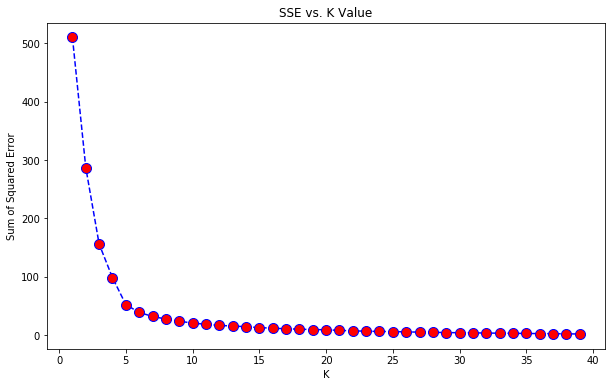

In [8]:
plt.figure(figsize=(10,6))
# use 1-40 as x axis ans error_rate as y axis
plt.plot(range(1,40), sse, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('SSE vs. K Value')
plt.xlabel('K')
plt.ylabel('Sum of Squared Error')

... I would pick 5 if there is no ground truth available @_@

Ground truth says four species, but from graph I would pick 5